<a href="https://colab.research.google.com/github/TMeesters/Descriptive-Stats/blob/main/Day_1_normalization_and_correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Normalization and Standardization

## Normalization

In [29]:
data = pd.DataFrame([{'Age': 31,'Height': 1.72,'Salary': 41000,'Weight': 74,'Years_school': 16},
              {'Age': 30,'Height': 1.74,'Salary': 38000,'Weight': 76,'Years_school': 16},
              {'Age': 54, 'Height': 2.1, 'Salary': 43000, 'Weight': 98, 'Years_school': 12},
              {'Age': 56, 'Height': 1.7, 'Salary': 38000, 'Weight': 61, 'Years_school': 12},
              {'Age': 56,'Height': 1.65,'Salary': 39000,'Weight': 59,'Years_school': 15},
              {'Age': 32,'Height': 1.87,'Salary': 39000,'Weight': 85,'Years_school': 18},
              {'Age': 23,'Height': 1.95,'Salary': 47000,'Weight': 88,'Years_school': 18},
              {'Age': 58,'Height': 2.04,'Salary': 36000,'Weight': 96,'Years_school': 12},
              {'Age': 39,'Height': 1.88,'Salary': 45000,'Weight': 76,'Years_school': 16},
              {'Age': 56, 'Height': 1.73, 'Salary': 27000, 'Weight': 63, 'Years_school': 9},
              {'Age': 39,'Height': 1.61,'Salary': 36000,'Weight': 55,'Years_school': 18},
              {'Age': 28, 'Height': 1.7, 'Salary': 40000, 'Weight': 68, 'Years_school': 21},
              {'Age': 56, 'Height': 1.64, 'Salary': 19000, 'Weight': 54, 'Years_school': 9},
              {'Age': 49,'Height': 1.67,'Salary': 34000,'Weight': 65,'Years_school': 15},
              {'Age': 32,'Height': 1.62,'Salary': 26000,'Weight': 64,'Years_school': 12},
              {'Age': 28,'Height': 1.92,'Salary': 31000,'Weight': 80,'Years_school': 16},
              {'Age': 50,'Height': 2.07,'Salary': 33000,'Weight': 84,'Years_school': 12},
              {'Age': 29,'Height': 1.96,'Salary': 33000,'Weight': 77,'Years_school': 16},
              {'Age': 29,'Height': 1.64,'Salary': 28000,'Weight': 56,'Years_school': 12}])
data.head()



,Age,Height,Salary,Weight,Years_school
0,31,1.72,41000,74,16
1,30,1.74,38000,76,16
2,54,2.10,43000,98,12
3,56,1.70,38000,61,12
4,56,1.65,39000,59,15


In [3]:
# between line 1 and 2, who is "more similar" to the individual in row 0?

In [6]:
# let's define the "distance" between individuals
def euclidean_d(row1,row2):
  distance_squared = (row1['Age']-row2['Age'])**2 + (row1['Height']-row2['Height'])**2 + (row1['Salary']-row2['Salary'])**2 + (row1['Weight']-row2['Weight'])**2 + (row1['Years_school']-row2['Years_school'])**2
  return np.sqrt(distance_squared)

In [7]:
#and compute d(ind0,ind1)
print(euclidean_d(data.iloc[0],data.iloc[1]))
#and d(ind0,ind2)
print(euclidean_d(data.iloc[0],data.iloc[2]))
#so individual 0 is closer to individual 2, right?
#what happened?

3000.000833399884
2000.2802664626774


In [8]:
#we will put each column in the same referential [0,1]:

In [15]:
yr_shcl_max = data['Years_school'].max()
yr_shcl_min = data['Years_school'].min()
data['Years_school_n'] = (data['Years_school']-yr_shcl_min)/(yr_shcl_max-yr_shcl_min)
data.head()



,Age,Height,Salary,Weight,Years_school,Years_school_n
0,31,1.72,41000,74,16,0.583333
1,30,1.74,38000,76,16,0.583333
2,54,2.10,43000,98,12,0.250000
3,56,1.70,38000,61,12,0.250000
4,56,1.65,39000,59,15,0.500000


In [16]:
data = data.drop(columns=['Years_school_n'])
for col in data.columns:
  col_max = data[col].max()
  col_min = data[col].min()
  data[col+"_n"] = (data[col]-col_min)/(col_max-col_min)
data.head()

,Age,Height,Salary,Weight,Years_school,Age_n,Height_n,Salary_n,Weight_n,Years_school_n
0,31,1.72,41000,74,16,0.228571,0.224490,0.785714,0.454545,0.583333
1,30,1.74,38000,76,16,0.200000,0.265306,0.678571,0.500000,0.583333
2,54,2.10,43000,98,12,0.885714,1.000000,0.857143,1.000000,0.250000
3,56,1.70,38000,61,12,0.942857,0.183673,0.678571,0.159091,0.250000
4,56,1.65,39000,59,15,0.942857,0.081633,0.714286,0.113636,0.500000


In [19]:
#now we again do our distance comparison, but in the normalized columns
def euclidean_dn(row1,row2):
  distance_squared = (row1['Age_n']-row2['Age_n'])**2 + (row1['Height_n']-row2['Height_n'])**2 + (row1['Salary_n']-row2['Salary_n'])**2 + (row1['Weight_n']-row2['Weight_n'])**2 + (row1['Years_school_n']-row2['Years_school_n'])**2
  return np.sqrt(distance_squared)


In [20]:
#and compute dn(ind0,ind1)
print(euclidean_dn(data.iloc[0],data.iloc[1]))
#and dn(ind0,ind2)
print(euclidean_dn(data.iloc[0],data.iloc[2]))
#so individual 0 is much closer to individual 1 than to individual 2

0.12660176373684465
1.2029075710182706


In [21]:
#there are pre made functions for this
#sklearn, short for scikit-learn is a very popular machine learning library. We will use it quite a bit
import sklearn
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit_transform(data[['Age','Height','Salary','Weight','Years_school']])

array([[0.22857143, 0.2244898 , 0.78571429, 0.45454545, 0.58333333],
       [0.2       , 0.26530612, 0.67857143, 0.5       , 0.58333333],
       [0.88571429, 1.        , 0.85714286, 1.        , 0.25      ],
       [0.94285714, 0.18367347, 0.67857143, 0.15909091, 0.25      ],
       [0.94285714, 0.08163265, 0.71428571, 0.11363636, 0.5       ],
       [0.25714286, 0.53061224, 0.71428571, 0.70454545, 0.75      ],
       [0.        , 0.69387755, 1.        , 0.77272727, 0.75      ],
       [1.        , 0.87755102, 0.60714286, 0.95454545, 0.25      ],
       [0.45714286, 0.55102041, 0.92857143, 0.5       , 0.58333333],
       [0.94285714, 0.24489796, 0.28571429, 0.20454545, 0.        ],
       [0.45714286, 0.        , 0.60714286, 0.02272727, 0.75      ],
       [0.14285714, 0.18367347, 0.75      , 0.31818182, 1.        ],
       [0.94285714, 0.06122449, 0.        , 0.        , 0.        ],
       [0.74285714, 0.12244898, 0.53571429, 0.25      , 0.5       ],
       [0.25714286, 0.02040816, 0.

In [22]:
pd.DataFrame(MinMaxScaler().fit_transform(data[['Age','Height','Salary','Weight','Years_school']]),columns=list(data.columns)[:5]).head()

,Age,Height,Salary,Weight,Years_school
0,0.228571,0.224490,0.785714,0.454545,0.583333
1,0.200000,0.265306,0.678571,0.500000,0.583333
2,0.885714,1.000000,0.857143,1.000000,0.250000
3,0.942857,0.183673,0.678571,0.159091,0.250000
4,0.942857,0.081633,0.714286,0.113636,0.500000


## Standardization

In [44]:
data = pd.DataFrame({'Grade': {0: 13,1: 13,2: 8,3: 14,4: 20,5: 20,6: 13,7: 17,8: 8,9: 1,10: 9,11: 16,12: 15,13: 19,14: 0,15: 16,16: 14,17: 19,18: 1},
              'Minutes_spent': {0: 233,1: 228,2: 231,3: 229,4: 233,5: 233,6: 225,7: 228,8: 234,9: 12,10: 231,11: 235,12: 239,13: 234,14: 6,15: 233,16: 227,17: 236,18: 18}})
data.head()




,Grade,Minutes_spent
0,13,233
1,13,228
2,8,231
3,14,229
4,20,233


In [35]:
# let's normalize
columns = data.columns
for col in columns:
  col_max = data[col].max()
  col_min = data[col].min()
  data[col+"_n"] = (data[col]-col_min)/(col_max-col_min)
data.head()



,Grade,Minutes_spent,Grade_n,Minutes_spent_n
0,13,233,0.65,0.974249
1,13,228,0.65,0.952790
2,8,231,0.40,0.965665
3,14,229,0.70,0.957082
4,20,233,1.00,0.974249


In [36]:
#wow, it seems like we have a lot of very extreme minutes_spent values!
data['Minutes_spent']

0     233
1     228
2     231
3     229
4     233
5     233
6     225
7     228
8     234
9      12
10    231
11    235
12    239
13    234
14      6
15    233
16    227
17    236
18     18
Name: Minutes_spent, dtype: int64

In [ ]:
#oh, those values are not extreme at all, in fact they are pretty "central"
#data standardization to the rescue

In [41]:
# let's standardize
for col in columns:
  col_mean = data[col].mean()
  col_std = data[col].std()
  data[col+"_s"] = (data[col]-col_mean)/(col_std)
data.head()




,Grade,Minutes_spent,Grade_n,Minutes_spent_n,Grade_s,Minutes_spent_s
0,13,233,0.65,0.974249,0.091121,0.435395
1,13,228,0.65,0.952790,0.091121,0.374746
2,8,231,0.40,0.965665,-0.695833,0.411135
3,14,229,0.70,0.957082,0.248512,0.386876
4,20,233,1.00,0.974249,1.192856,0.435395


In [45]:
#there are pre made functions for this
import sklearn
from sklearn.preprocessing import StandardScaler

StandardScaler().fit_transform(data[['Grade','Minutes_spent']])

array([[ 0.09361787,  0.44732556],
       [ 0.09361787,  0.38501481],
       [-0.71490009,  0.42240126],
       [ 0.25532146,  0.39747696],
       [ 1.22554301,  0.44732556],
       [ 1.22554301,  0.44732556],
       [ 0.09361787,  0.34762836],
       [ 0.74043224,  0.38501481],
       [-0.71490009,  0.4597877 ],
       [-1.84682523, -2.30680935],
       [-0.5531965 ,  0.42240126],
       [ 0.57872864,  0.47224985],
       [ 0.41702505,  0.52209845],
       [ 1.06383942,  0.4597877 ],
       [-2.00852882, -2.38158225],
       [ 0.57872864,  0.44732556],
       [ 0.25532146,  0.37255266],
       [ 1.06383942,  0.484712  ],
       [-1.84682523, -2.23203646]])

In [46]:
pd.DataFrame(StandardScaler().fit_transform(data[['Grade','Minutes_spent']]),columns=list(data.columns)[:2]).head()

,Grade,Minutes_spent
0,0.093618,0.447326
1,0.093618,0.385015
2,-0.714900,0.422401
3,0.255321,0.397477
4,1.225543,0.447326


# Covariance and correlation

In [48]:
# Covariance and correlation
import numpy as np

data_1 = np.random.normal(loc = 1, scale = 2, size = 200)
data_2 = np.random.normal(loc = 1, scale = 2, size = 200)
data_1

array([ 0.09460933, -1.64761558, -1.54744334, -0.28154121,  1.67027828,
       -0.16341772, -3.98567142,  0.76588954,  2.44613718,  0.21529207,
        5.18455958, -1.56173704, -0.16684687, -2.59829544,  1.02468674,
        1.28522624,  2.36648598,  5.13519666,  1.26550832,  3.33895914,
        1.35072766,  2.18463355, -1.40080224,  0.82155098,  2.19817694,
        1.58488655, -0.70322015,  2.10199561,  3.19613451, -2.27239163,
        1.6372468 ,  1.2694506 , -1.59418576,  4.35724457,  1.43878064,
       -0.94519619, -0.64101139,  2.3695803 ,  1.17681803, -1.15535988,
        2.89142301,  3.68463718,  4.41358507,  2.41717233,  1.2651431 ,
        0.50676959,  3.40189094,  4.66175356,  2.0137643 , -0.3665037 ,
       -0.15934915,  2.22404326, -0.28872766,  2.5937833 ,  4.86038966,
        4.20227156,  3.65876424,  0.11857169,  1.23337063,  0.98727054,
        4.96226263,  0.72030776, -2.11496037, -0.14112885,  4.46520138,
        2.81353895, -0.95016288, -0.22112488, -0.11971478,  3.60

In [49]:
data_2

array([-1.65978267, -1.96854349, -0.48327588, -2.62345922,  3.35167063,
        3.7366394 ,  2.23511234,  0.09294411,  4.1835693 ,  3.50376019,
        3.40330069,  1.1549121 ,  0.08957529, -0.11202372,  1.113461  ,
        1.56422606, -1.10296183,  4.34961648,  3.19001075,  6.54400376,
       -1.21170739,  2.28079034,  1.98683576,  3.01568158, -0.30688071,
        1.86446226,  0.73033013,  3.40363726,  1.31180015, -2.44871992,
        4.73085155,  0.7754752 ,  3.12111183, -2.63840776,  5.16397677,
        2.00690452,  1.4454582 ,  1.84313907, -1.40229149, -2.78004997,
        1.16721328,  3.52222515,  0.71061328, -1.07546585, -0.92428123,
        3.46256906,  5.9750844 ,  2.60583506,  2.57556   , -0.98688289,
        0.89459785,  2.39597994,  2.07799055,  1.48603353,  1.49309327,
        2.23919603, -1.52262763,  2.19211971,  1.84029509, -3.82252465,
       -1.24747824, -0.03305333,  3.07120364,  1.84270873, -0.24521576,
        1.13273545,  0.53869965, -2.39168006,  3.02426568,  2.15

In [53]:
# calculating the covariance between both arrays
np.cov(data_1,data_2)

#returns a matrix of covariances, how do I interpret this?
#[cov data_ 1 with data_1 == variance data_1, cov data_1 with data_2]
#[cov data_2 with data_1, cov data_2 with data_2 == variance data_2]


array([[3.99314768, 0.44066036],
       [0.44066036, 4.28857171]])

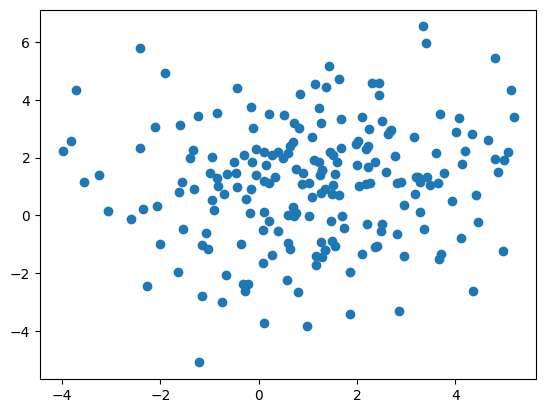

In [54]:
plt.scatter(data_1,data_2)
plt.show()

In [55]:
#If i force data_3 to be correlated to data_1 by centering each datapoint fromt he corresponding one in data_1
data_3 = - data_1 + np.random.normal(loc = 0, scale = 2, size = 200)

np.cov(data_1,data_3)

array([[ 3.99314768, -3.69991886],
       [-3.69991886,  7.24368919]])

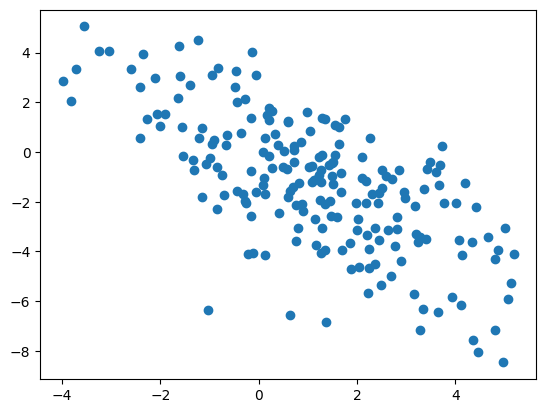

In [56]:
plt.scatter(data_1,data_3)
plt.show()

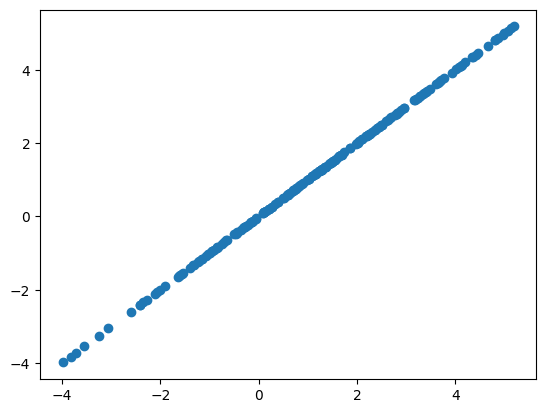

In [57]:
plt.scatter(data_1,data_1)
plt.show()

In [59]:
heights= np.array([171,165,157,171,190,160,184,172,160])
shoesize= np.array([39,36,33,42,45,36,43,42,36])
nr_pets=np.array([2,2,7,10,0,10,6,6,3])

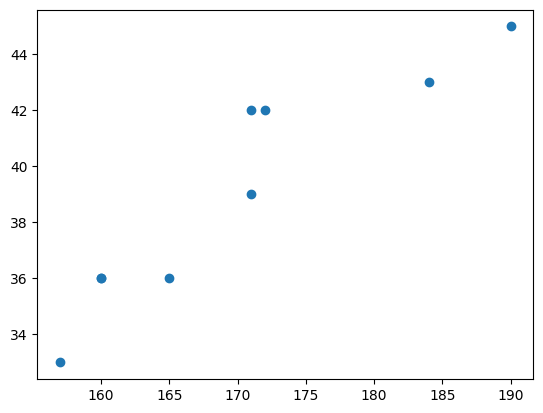

In [64]:
plt.scatter(heights,shoesize)
plt.show()

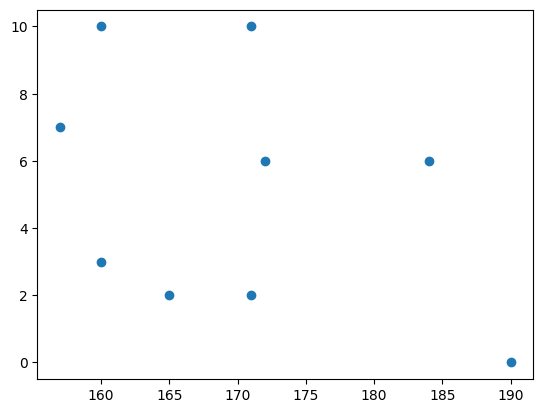

In [65]:
plt.scatter(heights,nr_pets)
plt.show()

In [66]:
np.cov(heights,shoesize)

array([[124.5       ,  42.25      ],
       [ 42.25      ,  16.61111111]])

In [67]:
np.cov(heights,nr_pets)

array([[124.5       , -15.375     ],
       [-15.375     ,  12.86111111]])

In [68]:
# let's calculate the correlation
# this command returns pearson correlation only
np.corrcoef(data_1,data_2)

# [ corr data_1 with itself, corr data_1 with data_2]
# [ corr data_2 with data_1, corr data_2 with itself]

array([[1.        , 0.10648537],
       [0.10648537, 1.        ]])

In [69]:
np.corrcoef(heights,shoesize)

array([[1.        , 0.92905772],
       [0.92905772, 1.        ]])

In [70]:
np.corrcoef(heights,nr_pets)

array([[ 1.        , -0.38422994],
       [-0.38422994,  1.        ]])

In [75]:
from scipy import stats

y = np.square(x) + np.random.normal(loc = 0, scale = 5, size = 10)
y = np.exp(x) + np.random.normal(loc = 0, scale = 5, size = 10)

In [81]:
from scipy import stats
# spearman correlation example -> good correlations
x = np.arange(0,10,1)

# try running the cells below with these combinations
y = np.square(x) + np.random.normal(loc = 0, scale = 5, size = 10)
y = np.exp(x) + np.random.normal(loc = 0, scale = 5, size = 10)


# spearman correlation example -> bad correlations
x = np.arange(-10,10,1)

# try running the cells below with these combinations
y = np.square(x) + np.random.normal(loc = 0, scale = 5, size = 20)
#y = np.exp(x) + np.random.normal(loc = 0, scale = 5, size = 20)


print(x)
print(y)
# # pearson
# print("Pearson correlation: ",stats.pearsonr(x,y)[0])
# # spearman
# print(stats.spearmanr(x,y))
# # kendall tau
# print(stats.kendalltau(x,y))
# plt.scatter(x,y)
# plt.show()

[-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9]
[ 1.01111394e+02  8.05214837e+01  5.68782239e+01  5.20050112e+01
  3.82965800e+01  2.32342980e+01  2.79454897e+01  4.73376115e+00
  1.15136781e+01  2.51610773e+00 -2.03567950e+00  6.94889563e+00
  2.30875839e+00 -6.51453774e-02  1.56261436e+01  2.18316477e+01
  4.44686307e+01  5.59354703e+01  6.31192280e+01  7.69159838e+01]
